<a href="https://colab.research.google.com/github/JoDeMiro/DeepLearningIntroduction/blob/main/01_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forrás:

https://thebojda.medium.com/tensorflow-alapoz%C3%B3-2-14720a33aca


# backpropagation, avagy hogyan működik a varázslat

Az előző cikkemben azt írtam, hogy egy neurális háló egy olyan fekete doboz, aminek van egy bemenete, van egy kimenete, és amin rengeteg potméter található. Ezekkel a potméterekkel lehet beállítani, hogy milyen működést valósítson meg a hálózat. Azt is írtam, hogy a dologban az a varázslat, hogy a potmétereket nem nekünk kell beállítani. Elég ha mintákat mutatunk egy optimalizáló algoritmusnak, ami ez alapján szépen behangolja nekünk a hálózatot. Ebben az írásban kicsit lemerészkedünk a nyúl üregébe és megnézzük hogyan is működik a varászlat, vagyis hogyan működik az optimalizáló algoritmus ami behangolja a hálózatot. Aki esetleg nem olvasta az első részt, az itt bepótolhatja:


Azt már az első részből megtudhattuk, hogy a tanítás folyamán minden lépésben kiszámoljuk a hálózat kimenetét, majd ezt összehasonlítva a kívánt kimenettel kiszámoljuk a hálózat hibáját. A cél ennek a hibának a minimalizálása. Hogy lehet nekifutni egy ilyen feladatnak? Nos, ezt a hibát ábrázolhatjuk egy függvényként. A függvény paraméterei a súlyok (a potméterek aktuális állásai), az aktuális bemenet és kimenet pedig az adott lépésben a függvény konstansai. Ha ezt ábrázolni próbálnánk, egy dimbes-dombos hiperfelületet kapnánk. Az egyetlen probléma a dologgal, hogy az előző cikkben szereplő neurális háló hibafüggvényének ábrázolásához 122 571 dimenziós térre lenne szükség. Ezt elég nehéz elképzelni. Ne is próbálja senki, mert csak belefájdul a feje. Első körben inkább kezdjünk két súllyal, mert azt még pont lehet ábrázolni 3 dimenzióban.

<img src="https://miro.medium.com/max/700/1*YTDwPXrnfbPndXxNw77O-w.png" />

Minél magasabban van egy pont a dombon, annál nagyobb a hiba és minél alacsonyabban, annál kisebb. A tér minden egyes pontja a potméterek adott állásához tartozik. Amikor optimalizáljuk a súlyokat, olyan mint ha a domb egy adott pontján állnánk, ahonnan szeretnénk lejjebb jutni a kisebb hiba irányába. Külön nehezítés a dologban, hogy nem látjuk át a teljes teret, csak a legközvetlenebb környezetünkről van információnk. Tehát úgy kellene lemászni a hegyről, hogy mindeközben be van kötve a szemünk, és csak tapogatózni tudunk.

Mit tehet ilyenkor az ember? Jobb híján kitapogatja, hogy merre lejt a hegy és az alapján elindul lefelé. No de egy sokparaméteres hibafüggvényről honnan tudjuk, hogy merre lejt egy adott pontban?

Fősulin analízisből egy komplett félévet szenteltek a deriválásnak és a függvénydiszkussziónak (függvényelemzésnek). A deriválás nagyon ment, mert alapvetően algoritmikus dologról volt szó amiben úgy általában jók szoktak lenni a programozó palánták. Le is deriváltam bármilyen függvényt, félév végén kaptam is rá szép jegyet, meg minden, de nagyon frusztrált, hogy nem értettem, mire lesz nekem ez jó. Aztán jöttek a neurális hálózatok, a lineáris regresszió, meg hasonlók, és hirtelen minden értelmet nyert… A deriválás lényege, hogy megmondjuk egy függvény adott pontjához húzott érintő meredekségét. Ez pont az ami nekünk kell, vagyis hogy “adott pontban merre lejt a hegy”. Ahogyan írtam, ha a deriválandó függvény megfelel bizonyos szabályoknak, akkor maga a deriválás simán algoritmikusan elvégezhető, tehát tudunk olyan programot írni, amibe bedobunk egy függvényt és kidobja annak a deriváltját. A neurális hálók összeállítása esetén direkt ilyen függvényeket használnak, így ha pl. Tensorflow-ban összerakunk egy hálózatot, akkor egy deriválható függvény lesz az eredmény. Innen már látszik nagyjából, hogy hogyan működik a tanítás: fogunk egy bemenetet, kiszámoljuk a kimenetet, kiszámoljuk a hibát, kiszámoljuk a deriváltakat, majd módosítjuk a súlyokat a deriváltaktól függően, hogy lejjebb jussunk a hegyen, vagyis minimalizáljuk a hibát. (Ezt a hegyről lemászós technikát egyébként gradient descent-nek hívják, amit nem tudok jól magyarra fordítani, de nem is nagyon érdemes, mert főleg angolul érhetőek el jó anyagok a témában.)

Ha valakit részletekbe menően érdekel, hogy hogyan tudunk egy olyan hatalmas függvényt lederiválni, mint egy neurális háló és rendelkezik a megfelelő matematikai alapokkal, az nézze meg Andrej Karpathy előadását a témában.

<a href="https://youtu.be/i94OvYb6noo">Youtube</a>

### Hiba visszaterjesztés

Dióhéjban összefoglalva arról van szó, hogy van egy láncszabály nevű deriválási szabály ami függvény függvényének a deriválásáról szól, tehát pont arról, hogy hogyan kell operátor (matematikai művelet) sorozatokat deriválni. Ennek értelmében ha van egy műveletsorozatunk aminek az elején bemegy valami, a végén pedig kijön egy hiba (ami a kimenet és az elvárt kimenet különbségéből adódik), ott a deriváltakat úgy számoljuk, hogy a hibát visszaszorozzuk az utolsó művelet “lokális deriváltjával”, így megkapjuk az utolsó művelet deriváltját. Ezt ha megszorozzuk az utolsó előtti művelet “lokális deriváltjával”, azzal megkapjuk az utolsó előtti művelet deriváltját, stb. Szóval ha szépen visszafelé haladunk a műveleteken, úgy szorzásokkal és a “lokális deriváltak” számolásával szépen kiszámolható minden paraméterhez a szükséges derivált (vagyis hogy merre lejt a hegy abban az irányban). Hogy mindezt meg lehessen tenni, minden Tensorflow operátor úgy van megadva, hogy nem csak a kimenetet tudja kiszámolni a bemenet és a paraméterek függvényében, hanem azt is, hogy a paraméterek függvényében mi a lokális derivált. Tehát minden Tensorflow operátor tudja magát deriválni! Ennek fényében a tanítás a következőképpen néz ki: Végigtoljuk a bemeneti tenzort az operátor folyamon, aminek a végén kijön az eredmény. Az eredmény alapján kiszámoljuk a hibát. Majd a hibát visszafelé újra végigtoljuk az operátor folyamon, csak ez esetben a lokális deriváltakat szorozgatjuk a láncszabály szerint. Mire visszaérünk az operátor folyam elejére, a művelet eredményeként kipotyog az összes paraméterhez tartozó derivált. A deriváltak alapján módosítjuk a súlyokat, és jöhet a következő minta. Ezt egészen addig ismételgetjük, amíg a modellünk nem lesz elég pontos (vagy amíg nem jövünk rá, hogy az aktuális hálózati struktúra nem lesz jó a problémához és másikat kell keresnünk). Ezt a módszert backpropagation-nek hívjuk, amit szoktak “hiba-visszaterjesztésnek” fordítani.

A deriváltak számolására Tensorflow-ban létezik egy GradientTape nevű osztály. Ez olyan mint egy videófelvevő. Ha elindítjuk, rögzít minden tensorflow műveletet, megállítás után pedig visszajátszhatjuk a műveleteket fordított sorrendben, hogy megkapjuk a deriváltakat. Nézzünk is egy példát a használatára.



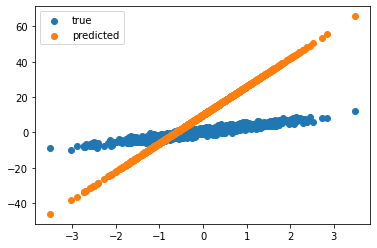

Epoch 0: Loss: 274.66973876953125
Epoch 1: Loss: 171.6041717529297
Epoch 2: Loss: 107.36015319824219
Epoch 3: Loss: 67.31220245361328
Epoch 4: Loss: 42.34571075439453
Epoch 5: Loss: 26.780149459838867
Epoch 6: Loss: 17.07497215270996
Epoch 7: Loss: 11.02332592010498
Epoch 8: Loss: 7.249541282653809
Epoch 9: Loss: 4.896041393280029
Epoch 10: Loss: 3.4281764030456543
Epoch 11: Loss: 2.5126025676727295
Epoch 12: Loss: 1.941469430923462
Epoch 13: Loss: 1.5851668119430542
Epoch 14: Loss: 1.3628668785095215
Epoch 15: Loss: 1.2241597175598145
Epoch 16: Loss: 1.1376030445098877
Epoch 17: Loss: 1.0835844278335571
Epoch 18: Loss: 1.0498690605163574
Epoch 19: Loss: 1.028823733329773


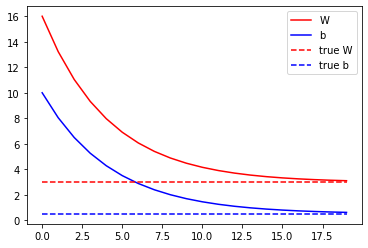

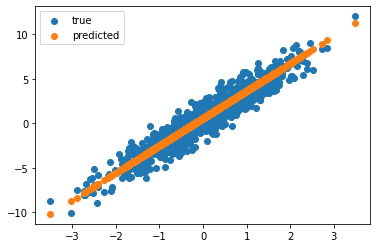

In [3]:
# Linear regression using GradientTape
# based on https://sanjayasubedi.com.np/deeplearning/tensorflow-2-linear-regression-from-scratch/

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class Model:
    def __init__(self):
        self.W = tf.Variable(16.0)
        self.b = tf.Variable(10.0)

    def __call__(self, x):
        return self.W * x + self.b

TRUE_W = 3.0 # slope
TRUE_b = 0.5 # intercept

NUM_EXAMPLES = 1000

X = tf.random.normal(shape=(NUM_EXAMPLES,))
noise = tf.random.normal(shape=(NUM_EXAMPLES,))
y = X * TRUE_W + TRUE_b + noise

model = Model()

plt.figure()
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()
plt.savefig('untrained_vs_real.png')
plt.show()

def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

def train(model, X, y, lr=0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(X))

    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(lr * dW)
    model.b.assign_sub(lr * db)

Ws, bs = [], []
epochs = 20
for epoch in range(epochs):
    Ws.append(model.W.numpy()) # eager execution allows us to do this
    bs.append(model.b.numpy())

    current_loss = loss(y, model(X))

    train(model, X, y, lr=0.1)
    print(f"Epoch {epoch}: Loss: {current_loss.numpy()}")

plt.figure()
plt.plot(range(epochs), Ws, 'r', range(epochs), bs, 'b')
plt.plot([TRUE_W] * epochs, 'r--', [TRUE_b] * epochs, 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.savefig('learning_curve.png')
plt.show()

plt.figure()
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()
plt.savefig('traied_vs_real.png')
plt.show()

A kód elején definiálunk egy nagyon-nagyon egyszerű lineáris modellt, ami annyiból áll, hogy a bemenetet megszorozzuk egy W súllyal, és hozzáadunk egy b számot. Akinek még rémlik matekóráról, annak beugorhat, hogy ez pont egy egyenes egyenlete. Felfoghatjuk ezt egy nagyon egyszerű neurális hálózatnak is, ami 1 db neuronból áll, aminek egy bemenete van és nincs kimeneti függvénye. Ezt a modellt fogjuk tanítani, amihez generálunk egy rakás (1000 db) mintát. A modellben a W és a b kezdőértéke egyaránt 16, míg az elérendő értékek (TRUE_W és TRUE_b) 3 és 0.5. A következő pár sorral ki is rajzoltatjuk a modellünk által meghatározott egyenest, valamint a tanító halmazt.

A cél ugye az lenne, hogy a narancssárga vonal egybeessen a kék vonallal. A tanításhoz definiálunk egy loss függvényt, aminek két paramétere két egydimenziós (1000 elemű) tenzor lesz. Az első paraméter (y) az elvárt kimeneteket tartalmazza, a második paraméter (pred_y) pedig a modell által adott értékeket. A hibát úgy számoljuk, hogy minden esetben vesszük a kapott és az elvárt érték különbségét és négyzetre emeljük, aztán az egészből átlagot számolunk. A loss függvény visszatérési értéke tehát egy szám lesz. A lényeg a train metódusban van. Itt hozzuk létre a GradientTape-et. Python-ban a with operátor úgy működik, hogy meghívja a létrehozott objektum __enter__ metódusát, majd a with blokk végén az __exit__ metódust. A GradientTape esetén tehát a with részben kezdődik a rögzítés, és egészen a blokk végéig tart. A with blokkon belül lefuttatjuk a model-t az X bemeneten, majd a loss függvénnyel kiszámoljuk a hibát. A művelet közben végrehajtott minden operátort rögzít a GradientTape a későbbi deriváláshoz. A with blokkban tehát egyszer végigtoltuk a bemeneti tenzorunkat a modell gráfon, hogy kipottyanjon a hiba. Jöhet a visszafele működtetés. Erre szolgál a GradientTape gradient metódusa, aminek első paramétere az eredmény tenzor, a második paramétere pedig a változók listája, amikhez a deriváltakat kérjük. Jelen esetben a W és a b változó deriváltjaira lesz szükség, amit a függvény egy listában vissza is ad. Most, hogy megvannak a deriváltak, felszorozzuk őket egy lr változóval (learning rate), és levonjuk a W és a b aktuális értékéből. A hegyes példánál maradva a gradient metódus adja meg, hogy merre lejt a hegy (ez a tapogatás), míg a paraméterek módosítása az elmozdulás abba az irányba. A learnig rate azt mondja meg, hogy egy lépésben mekkorát lépjünk. Ha túl kicsi learning rate-et választunk, akkor sokáig fog tartani a tanítás (kis lépésekkel lassabban jutunk le a hegyről), míg nagy lépések esetén előfordulhat, hogy “átugorjuk” a völgyet, így soha nem érünk le a hegyről. Fontos tehát, hogy jó értéket válasszunk az lr (learning rate) változónak. A tanítás után megjelenítjük a paraméterek időbeni változását. Itt szépen látszik, hogy hogyan érte el a W és a b paraméter a kívánt értéket.


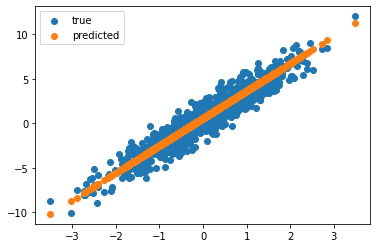

In [4]:
plt.figure()
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()
plt.show()

Végül megjelenítjük újra a minta ponthalmazt és a modell által meghatározott egyenest, amik láthatóan most már egybe esnek.

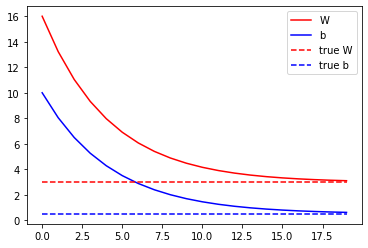

In [5]:
plt.figure()
plt.plot(range(epochs), Ws, 'r', range(epochs), bs, 'b')
plt.plot([TRUE_W] * epochs, 'r--', [TRUE_b] * epochs, 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.savefig('learning_curve.png')
plt.show()

Most, hogy már értjük a tanítás működését és kicsit kifejtettük, hogy mi van a dobozban, vegyük elő az előző cikkben szereplő konvolúciós hálós kódunk tanítás részét. Az előző cikkben ezt a részt átugrottam, de most már rendelkezünk a szükséges tudással az értelmezéséhez.

```
model.compile(optimizer=’adam’, loss=’sparse_categorical_crossentropy’)
```

A fenti rész beállítja a tanítás paramétereit. A sparse_categorical_crossentropy egy hibafüggvény. Olyan mint a mi loss függvényünk az előző példában, csak kicsit bonyolultabb. Ezt a hibafüggvényt osztályozást végző neurális hálók esetén szokták használni. A másik paraméter az optimizer, ahol a tanítást végző algoritmust tudjuk megadni. Ez az a függvény, ami a deriváltak alapján a paramétereket fogja módosítani. A mi fenti példánkban ezt a feladatot az a két sor végezte, ahol a W és a b paraméterekből levontuk a vonatkozó derivált és a learning rate szorzatát. Ilyen optimalizációs algoritmusból is van több, amik a deriváltak ismeretében különböző stratégiák mentén lépnek kisebbeket vagy nagyobbakat.


```
model.fit(train_images, train_labels, epochs=10)
```

Az előző cikk konvolúciós hálós mintájában a fit metódus végezte a tanítást. Ez a metódus tartalmazza a GradientTape-es ciklust. A metódus első két paramétere a tanító képeket és a hozzájuk tartozó címkéket tartalmazza, míg az epochs azt, hogy hányszor ismételjük meg a tanítást. Most már tudjuk, hogy a metódus belsejében a GradientTape rögzíti a modell végrehajtása, valamint a hibafüggvény (sparse_category_crossentropy) futtatása közben futtatott operátorokat, majd a futtatás végeztével visszagörgeti a folyamatot, hogy kijöjjenek a deriváltak. Az így kapott deriváltakat megkapja az optimizer (adam), ami alapján módosítja a hálózat paramétereit. A folyamatot 10x ismételjük meg, ami alatt a hálózat egész jól megtanul cicákat felismerni.

Körülbelül ennyit szerettem volna írni a “varázslatról”, aminek köszönhetően a neurális hálók tanulni képesek. Bár deriválásról szórakoztató formában írni elég embert próbáló feladat, én megpróbáltam megtenni minden tőlem telhetőt. Remélem sokan gondolják majd hasznosnak a fentieket.

> Ha részletekbe menően érdekel, hogyan működik a backpropagation és hogy mi van a GradientTape belsejében, úgy érdemes elolvasnod <a href="https://imaddabbura.github.io/post/coding-nn-fwd-bckwd-prop/">ezt az írást</a>, ahol nulláról felépítenek numpy-al egy egyszerű neurális háló keretrendszert, ami támogatja a leggyakoribb átviteli függvényeket, képes a hálózat futtatására és a backpropagation-re.

